# Análise Exploratória

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fast")

In [2]:
# Lendo o arquivo excel
df = pd.read_excel('datasets/AdventureWorks.xlsx')

In [5]:
# Imprimindo as primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Retornando o tamanho do conjunto de dados
df.shape

(904, 16)

In [7]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

### Qual a receita total?

In [14]:
df['Valor Venda'].sum()

5984606.1426

### Qual o custo por Produto?

In [16]:
df['Custo'] = df['Custo Unitário'] * df['Quantidade']

In [17]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


### Qual o custo Total?

In [19]:
round(df['Custo'].sum(),2)

2486783.05

### Qual o lucro por Produto?

In [23]:
# Lucro = Receita (Valor Venda) - Custo
df['Lucro'] = df['Valor Venda'] - df['Custo']
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


### Qual o lucro Total?

In [21]:
round(df['Lucro'].sum(), 2)

3497823.09

### Qual o tempo de envio do produto?

In [25]:
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [26]:
df['Tempo Envio'].dtype

dtype('int64')

### Qual o tempo médio de envio por marca?

In [27]:
df.groupby('Marca')['Tempo Envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [28]:
# Verificando valores vazios ou nulos
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

### E o Lucro por Ano e por Marca?

In [32]:
pd.options.display.float_format = '{:20,.2f}'.format
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [33]:
# Resetando o index
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Qual o total de produtos vendidos?

In [40]:
produtos_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True)
produtos_vendidos

Produto
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Black             1089
Headphone Adapter for Contoso Phone E130 White     25008
Headphone Adapter for Contoso Phone E130 Silver    25232
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

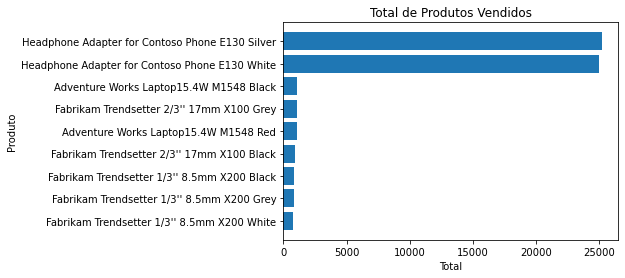

In [53]:
# Gráfico de barras horizontais
plt.barh(y=produtos_vendidos.index, width=produtos_vendidos)
plt.title("Total de Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

### Comparativo Lucro Ano x Ano

In [51]:
lucro_ano = df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()
lucro_ano

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

Text(0, 0.5, 'Receita')

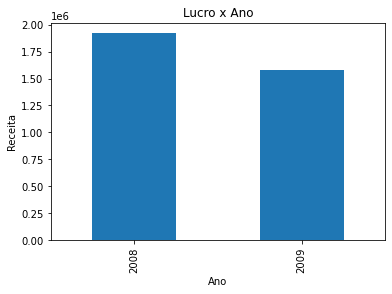

In [59]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

### Desempenho 2009

In [61]:
# Filtro para vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


### Comparativo Lucro Mês x Mês

Text(0.5, 1.0, 'Lucro Mês x Mês (2009)')

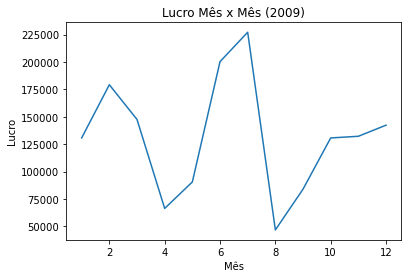

In [67]:
lucro_mes_2009 = df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot()
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.title("Lucro Mês x Mês (2009)")

### Comparativo Lucro por Marca

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

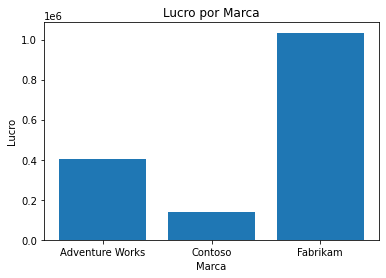

In [71]:
lucro_marca_2009 = df_2009.groupby('Marca')['Lucro'].sum()
plt.bar(lucro_marca_2009.index, height=lucro_marca_2009)
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.title("Lucro por Marca")
plt.xticks(rotation='horizontal')

### Comparativo Lucro por Classe

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

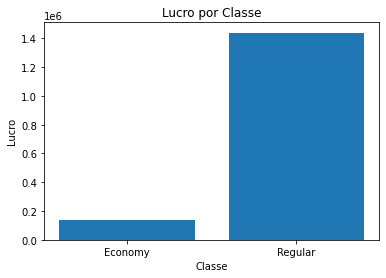

In [72]:
lucro_classe_2009 = df_2009.groupby('Classe')['Lucro'].sum()
plt.bar(lucro_classe_2009.index, height=lucro_classe_2009)
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.title("Lucro por Classe")
plt.xticks(rotation='horizontal')

### Análises do Tempo de envio

In [73]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

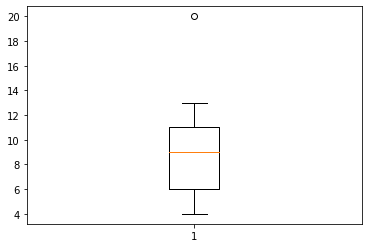

In [75]:
# Gráfico de boxplot
plt.boxplot(df['Tempo Envio']);

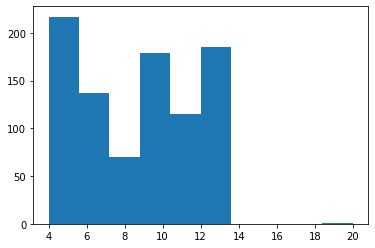

In [78]:
# Histograma
plt.hist(df['Tempo Envio']);

### Qual o maior tempo de entrega de um produto? E qual o menor?

In [83]:
# Maior Tempo de Entrega
maior_tempo_entrega = df['Tempo Envio'].max()
maior_tempo_entrega

20

In [84]:
# Menor Tempo de Entrega
menor_tempo_entrega = df['Tempo Envio'].min()
menor_tempo_entrega

4

### Qual o produto levou maior tempo de entrega

In [85]:
df[df['Tempo Envio'] == maior_tempo_entrega]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [87]:
# Exportando a base para .csv
df.to_csv("df_vendas_analisado.csv", index=False)